In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
#plt.style.use('dark_background')

In [0]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


# Task:
1. To create a mean regression model based on "No of Floors" column and call it "floor_mean"
2. To compare the residual plots of overall "mean_sales" and "floor_mean".
3. To calculate the R-Square value for "floor_mean" model manually without using sklearn.

## 1. To create "floor_mean" column

In [0]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [0]:
## To check the unique values in column "No of Floors"

###### Start code ######
data['No of Floors'].unique()
###### End code ######

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

### Expected Output


```
array([1. , 2. , 1.5, 3. , 2.5, 3.5])
```


In [0]:
## Using pandas.pivot_table() to calculate the "floor_mean"

### Start code ###
floor_mean = data.pivot_table(values = 'Sale_Price' , columns = 'No of Floors', aggfunc = np.mean)
### End code ###
floor_mean

No of Floors,1.0,1.5,2.0,2.5,3.0,3.5
Sale_Price,431826.297032,542188.988482,599260.70846,798774.47205,551141.645425,662634.375


### Expected Output
<img src="images/image1.png">

In [0]:
# making new column
data['floor_mean'] = 0

# for every unique floor_mean, fill its mean price in new column "floor_mean"
for i in floor_mean.columns:
  ### start code ###
  data['floor_mean'][data['No of Floors'] == i] = floor_mean[i][0]
  ### end code ###

data['floor_mean'].head()

0    431826.297032
1    599260.708460
2    431826.297032
3    431826.297032
4    431826.297032
Name: floor_mean, dtype: float64

## 2. To Compare Residual plots

### Expected Output
<img src="images/image2.png">

In [0]:
## Calculating residuals
### start code###
mean_difference = data['mean_sales'] - data['Sale_Price']
floor_mean_difference = data['floor_mean'] - data['Sale_Price']
### end code ###
mean_difference.size, floor_mean_difference.size

(21609, 21609)

### Expected Outcome
<img src="images/image3.png">

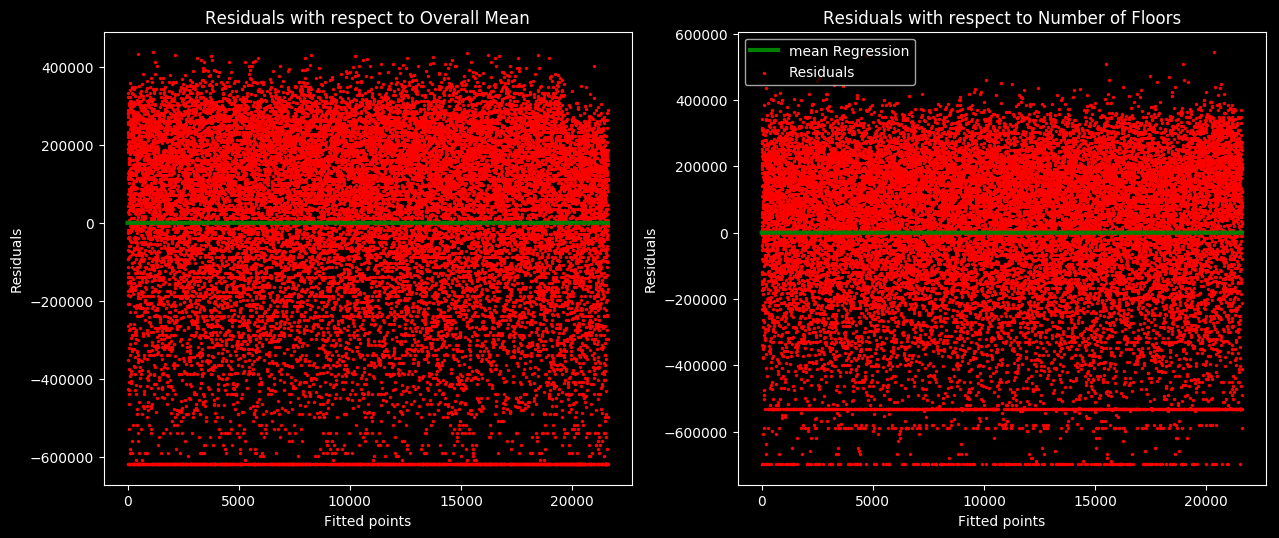

In [0]:
## Plotting the Residuals for comparison

k = range(0, len(data)) # for x axis
l = [0 for i in range(len(data))] # for regression line in residual plot

plt.figure( figsize = (15,6), dpi =100)

################## plot for Overall Mean ####################
plt.subplot(1,2,1)
#code to create the residual of mean regression model along with regression line
### start code ###
plt.scatter( k , mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
### end code ###
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')


################## plot for Overall Mean ####################
plt.subplot(1,2,2)
#code to create the residual of floor mean regression model along with regression line
### start code ###
plt.scatter( k , floor_mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
### end code ###
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title("Residuals with respect to Number of Floors")

plt.legend()

### Expected Outcome
<img src="images/image4.png">

## 3. To calculate $R^2$ value of the "floor_mean" model manually
<img src="images/image5.png">

In [0]:
## Calculate mean square error for overall mean regression model and call it MSE 1
### start code ###
MSE1 = ((mean_difference ** 2) / len(mean_difference)).sum()
### end code ###

## Calculate mean square error for floor mean regression model and call it MSE 2
### start code ###
MSE2 = sum((floor_mean_difference ** 2) / len(floor_mean_difference))
### end code ###

## calculate R-Square value using the formula and call it R2
### start code ###å
R2 = 1 - ( MSE2 / MSE1 )
### end code ###
R2

0.10914638255443931

### Expected Outcome
<img src="images/image6.png">